# Examples

This example is following the [DFTK.jl](https://juliamolsim.github.io/DFTK.jl/) documentation for an [example of how to use their code](https://juliamolsim.github.io/DFTK.jl/stable/guide/tutorial/).

In [1]:
using DFTK
using Plots
using Unitful
using UnitfulAtomic
using LinearAlgebra

┌ Warning: Package DFTK does not have Plots in its dependencies:
│ - If you have DFTK checked out for development and have
│   added Plots as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with DFTK
│ Loading Plots into DFTK from project dependency, future warnings for DFTK are suppressed.
└ @ nothing nothing:910


Julia comes with its own package manager, so adding new packages is very easy. Simply type ```]``` to enter package mode in the Julia REPL. Then type

```add your new package here```

Julia will take care of the rest!

$$ E = mc^{2}$$

The first step any dft calculation is to define the crystal (or molecular) structure that we would like to study. In DFTK.jl, we do this as follows

## Silicon

In [144]:
a = 5.431u"angstrom" # Lattice constant for Silicon; the Unitful package let's specify
                     # values in units other than DFTK.jl's internal units.
lattice = 0.5*a*[[0 1. 1.];
                 [1. 0. 1.]; 
                 [1. 1. 0.]] # Lattice/basis vectors for the Silicon crystal. (Column format)
                                                 

3×3 Array{Quantity{Float64,𝐋,Unitful.FreeUnits{(Å,),𝐋,nothing}},2}:
    0.0 Å  2.7155 Å  2.7155 Å
 2.7155 Å     0.0 Å  2.7155 Å
 2.7155 Å  2.7155 Å     0.0 Å

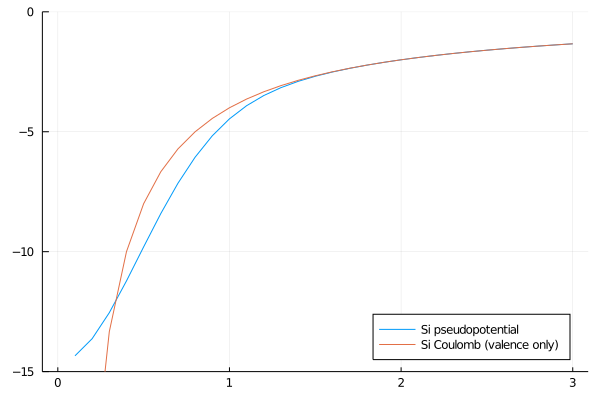

In [145]:
# pseudopotential
Si_pseudo = ElementPsp(:Si, psp=load_psp("hgh/lda/Si-q4"))

# all-electron
Si_coulomb = ElementCoulomb(:Si)

rs = collect(0:0.1:3)
p = plot(ylims=(-15, 0), legend=:bottomright)
plot!(p, rs, DFTK.local_potential_real.(Ref(Si_pseudo), rs), label="Si pseudopotential")
plot!(p, rs, -4 ./ abs.(rs), label="Si Coulomb (valence only)")

In [146]:
atoms = [Si_pseudo => [ones(3)/8, -ones(3)/8]] # positions of atoms in the basis of lattice vectors

1-element Array{Pair{ElementPsp,Array{Array{Float64,1},1}},1}:
 ElementPsp(14, :Si, PspHgh(4, 0.44, [-7.33610297, 0.0, 0.0, 0.0], 1, [0.42273813, 0.48427842], [[5.90692831 -1.26189397; -1.26189397 3.25819622], [2.72701346]], "hgh/lda/si-q4", "Si GTH-PADE-q4 GTH-LDA-q4")) => [[0.125, 0.125, 0.125], [-0.125, -0.125, -0.125]]

In [147]:
model = model_LDA(lattice, atoms)
kgrid = [5, 5, 5];
Ecut = 190.5u"eV";

In [148]:
basis = PlaneWaveBasis(model, Ecut; kgrid = kgrid)

PlaneWaveBasis (Ecut=7.000745874436293, 10 kpoints)

In [149]:
scfres = self_consistent_field(basis, tol=1e-8)

n     Energy            Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -7.902949681046         NaN   1.97e-01    3.6 
  2   -7.907582452428   -4.63e-03   2.98e-02    1.0 
  3   -7.907827666759   -2.45e-04   3.01e-03    1.4 
  4   -7.907855255202   -2.76e-05   1.25e-03    2.7 
  5   -7.907855933338   -6.78e-07   5.76e-04    1.2 
  6   -7.907856116770   -1.83e-07   1.81e-05    1.2 
  7   -7.907856124997   -8.23e-09   6.74e-06    2.9 


(ham = Hamiltonian(PlaneWaveBasis (Ecut=7.000745874436293, 10 kpoints), HamiltonianBlock[HamiltonianBlock(PlaneWaveBasis (Ecut=7.000745874436293, 10 kpoints), Kpoint{Float64}(Model{Float64}([0.0 5.131551291421279 5.131551291421279; 5.131551291421279 0.0 5.131551291421279; 5.131551291421279 5.131551291421279 0.0], [-0.6122110985895788 0.6122110985895788 0.6122110985895789; 0.6122110985895788 -0.6122110985895788 0.6122110985895789; 0.6122110985895789 0.6122110985895789 -0.6122110985895789], 270.25641916692047, 0.917832827827092, 3, 8, :none, 1, 0.0, DFTK.Smearing.None(), Pair{Any,Array{StaticArrays.SArray{Tuple{3},Float64,1,3},1}}[ElementPsp(14, :Si, PspHgh(4, 0.44, [-7.33610297, 0.0, 0.0, 0.0], 1, [0.42273813, 0.48427842], [[5.90692831 -1.26189397; -1.26189397 3.25819622], [2.72701346]], "hgh/lda/si-q4", "Si GTH-PADE-q4 GTH-LDA-q4")) => [[0.125, 0.125, 0.125], [-0.125, -0.125, -0.125]]], Any[Kinetic(1), AtomicLocal(), AtomicNonlocal(), Ewald(), PspCorrection(), Hartree(1), Xc([:lda_xc_t

In [150]:
scfres.energies

Energy breakdown:
    Kinetic             3.0882014 
    AtomicLocal         -2.1873805
    AtomicNonlocal      1.7315248 
    Ewald               -8.3979253
    PspCorrection       -0.2946254
    Hartree             0.5462370 
    Xc                  -2.3938880

    total               -7.907856124997


In [151]:
hcat(scfres.occupation...)

7×10 Array{Float64,2}:
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:02


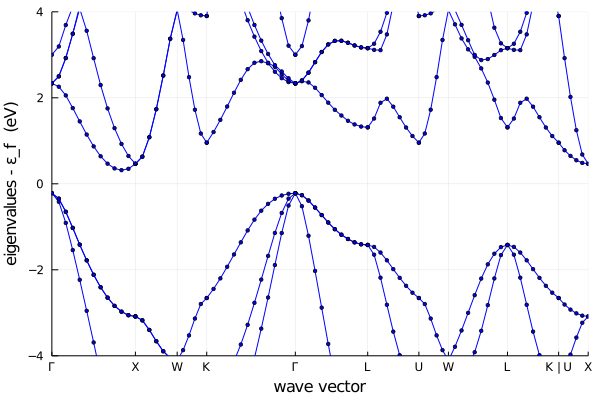

In [168]:
plot_bandstructure(scfres, kline_density=10)

## Germanium

In [32]:
Ge = ElementCohenBergstresser(:Ge);
lattice = 0.5*Ge.lattice_constant*[[0 1. 1.];
                 [1. 0. 1.]; 
                 [1. 1. 0.]];
atoms = [Ge => [0*ones(3), ones(3)/4]];

In [33]:
Ecut = 10.0
model = Model(lattice; atoms=atoms, terms=[Kinetic(), AtomicLocal()])
basis = PlaneWaveBasis(model, Ecut, kgrid = (1,1,1))

PlaneWaveBasis (Ecut=10.0, 1 kpoints)

In [34]:
ham = Hamiltonian(basis)
eigres = diagonalize_all_kblocks(DFTK.lobpcg_hyper, ham, 6)
εF = DFTK.fermi_level(basis, eigres.λ)

0.34653710708469115

In [7]:
scfres.energies

Energy breakdown:
    Kinetic             3.0112775 
    AtomicLocal         -2.3267395
    AtomicNonlocal      0.7885691 
    Ewald               -8.0609990
    PspCorrection       0.3837266 
    Hartree             0.5802608 
    Xc                  -2.3307848

    total               -7.954689378523


Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:01


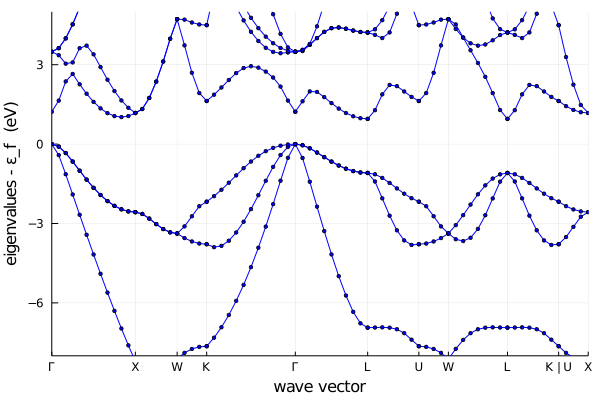

In [36]:
n_bands = 8
ρ0 = guess_density(basis)  # Just dummy, has no meaning in this model
ρspin0 = nothing
p = plot_bandstructure(basis, ρ0, ρspin0, n_bands, εF=εF, kline_density=10)
ylims!(p, (-8, 5))

## TiC

In [68]:
Ti            = ElementPsp(:Ti, psp=load_psp("hgh/lda/ti-q4"))
C             = ElementPsp(:C, psp=load_psp("hgh/lda/c-q4"))
a             = 4.328u"angstrom"
lattice       = a*[[1 0 0]; [0 1 0]; [0 0 1]];
atoms         = [Ti => [zeros(3)], C=> [0.5*ones(3)]];
Ecut          = 20.
tol           = 1e-11
maxiter       = 50
kspacing      = 0.3
smearing      = Smearing.FermiDirac()
temperature   = 0.0001
supersampling = 1.5
model = model_LDA(lattice, atoms, smearing=smearing, temperature=temperature)
kgrid = kgrid_size_from_minimal_spacing(lattice, kspacing);

In [69]:
basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid, kshift=[0, 0, 0])
n_bands = ceil(Int, model.n_electrons // 2 + sqrt(model.n_electrons // 2))

println()
println("temperature    = $(basis.model.temperature)")
println("smearing       = $(basis.model.smearing)")
println("Ecut           = $Ecut")
println("fft_size       = $(basis.fft_size)")
println("kgrid          = $kgrid")
println("irreducible k  = $(length(basis.kpoints))")
println("n_bands        = $(n_bands)")
println("n_electr       = $(basis.model.n_electrons)")
println("mixing         = $mixing")


temperature    = 0.0001
smearing       = DFTK.Smearing.FermiDirac()
Ecut           = 20.0
fft_size       = (36, 36, 36)
kgrid          = [3, 3, 3]
irreducible k  = 4
n_bands        = 6
n_electr       = 8
mixing         = SimpleMixing(0.8)


In [70]:
ρ0 = guess_density(basis)
scfres = self_consistent_field(basis, ρ=ρ0, tol=tol, mixing=mixing,                   
                                   maxiter=maxiter, n_bands=n_bands,
                                   enforce_symmetry=true)
println(scfres.energies)

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -6.547061210241         NaN   8.45e-01    7.5 
  2   -4.023682856120    2.52e+00   1.42e+00    6.0 
  3   -7.797295152071   -3.77e+00   5.92e-01    6.8 
  4   -8.494572380946   -6.97e-01   2.94e-01    6.3 
  5   -8.666564178859   -1.72e-01   1.21e-01    5.3 
  6   -7.642459707078    1.02e+00   5.28e-01    3.8 
  7   -5.228840085670    2.41e+00   1.12e+00    4.0 
  8   +0.206443401189    5.44e+00   1.54e+00    2.5 
  9   -8.490284936366   -8.70e+00   2.18e-01    6.5 
 10   -8.665862571094   -1.76e-01   1.27e-01    2.3 
 11   -8.693021060601   -2.72e-02   1.02e-01    1.0 
 12   -8.738080200970   -4.51e-02   4.84e-02    3.0 
 13   -8.735667357463    2.41e-03   5.23e-02    1.8 
 14   -8.731405513820    4.26e-03   5.66e-02    4.8 
 15   -8.739071897637   -7.67e-03   1.70e-02    1.5 
 16   -8.739213195703   -1.41e-04   1.09e-02    2.5 
 17   -8.739492286712   -2.79e-04   2.38e-03    

Computing bands along kpath:
       Γ -> X -> M -> Γ -> R -> X  and  M -> R


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:40


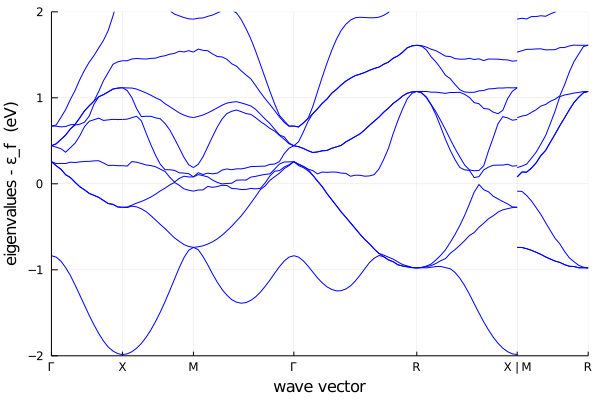

In [75]:
p = plot_bandstructure(scfres, kline_density=20)
ylims!(p, -2, 2)

## H2 molecule - Bond Length

In [138]:
cubic = 10 *[[1 0 0]; [0 1 0]; [0 0 1]];
H = ElementPsp(:H, psp=load_psp("hgh/lda/H-q1"));
lengths = collect(0.5:0.025:0.9)
molecules = [ [H => [zeros(3), [len, 0., 0.]]] for len in lengths];
kgrid = [1, 1, 1];
Ecut = 5;

In [139]:
energies = [];
foreach(molecules) do atom
    model = model_LDA(cubic, atom)
    basis = PlaneWaveBasis(model, Ecut; kgrid = kgrid)
    scfres = self_consistent_field(basis, tol=1e-8, callback=info->nothing);
    push!(energies, scfres.energies.total)
end

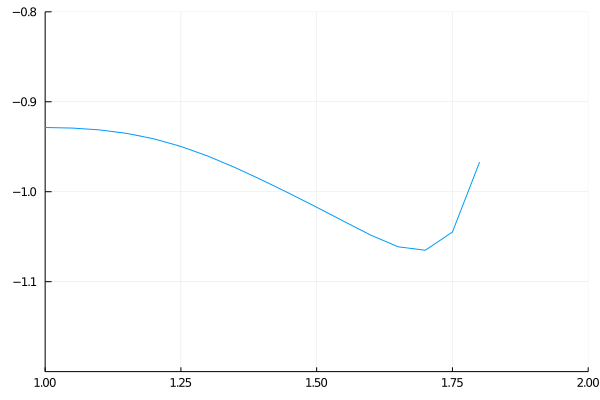

In [142]:
plot(2*lengths, energies, ylims=(-1.2, -0.8), xlims=(1, 2), label ="")

## Magnetism Example (BCC Fe)

In [37]:
a = 5.42352  # Bohr
lattice = a / 2 * [[-1  1  1];
                   [ 1 -1  1];
                   [ 1  1 -1]]
Fe = ElementPsp(:Fe, psp=load_psp("hgh/lda/Fe-q8.hgh"))
atoms = [Fe => [zeros(3)]];

In [39]:
kgrid = [3, 3, 3]  # k-point grid (Regular Monkhorst-Pack grid)
Ecut = 40          # kinetic energy cutoff in Hartree
model_nospin = model_LDA(lattice, atoms, temperature=0.01)
basis_nospin = PlaneWaveBasis(model_nospin, Ecut; kgrid=kgrid)
scfres_nospin = self_consistent_field(basis_nospin, tol=1e-6, mixing=KerkerMixing());

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -18.18227952320         NaN   2.14e+00    6.5 
  2   -19.13906635916   -9.57e-01   1.32e+00    4.3 
  3   -20.48249668097   -1.34e+00   2.14e-01    4.3 
  4   -20.52310782840   -4.06e-02   5.96e-02    2.8 
  5   -20.52379566913   -6.88e-04   4.56e-02    1.0 
  6   -20.52531579768   -1.52e-03   3.92e-03    1.8 
  7   -20.52532581857   -1.00e-05   1.69e-03    2.0 
  8   -20.52532680576   -9.87e-07   4.33e-04    1.8 


In [40]:
magnetic_moments = [Fe => [4, ]];
kgrid = [3, 3, 3]
Ecut = 40
model_spin = model_LDA(lattice, atoms, magnetic_moments=magnetic_moments, temperature=0.01)
basis_spin = PlaneWaveBasis(model_spin, Ecut; kgrid=kgrid)
ρspin  = guess_spin_density(basis_spin, magnetic_moments)
scfres = self_consistent_field(basis_spin, tol=1e-6, ρspin=ρspin, mixing=KerkerMixing());

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Magnet   Diag
---   ---------------   ---------   --------   ------   ----
  1   -18.22190618086         NaN   2.14e+00    2.000    5.4 
  2   -19.29145761640   -1.07e+00   1.28e+00    1.815    4.1 
  3   -20.57337587566   -1.28e+00   2.34e-01    2.958    3.9 
  4   -20.59599370879   -2.26e-02   1.81e-01    2.960    1.5 
  5   -20.63436409018   -3.84e-02   3.69e-02    2.980    2.3 
  6   -20.63495244739   -5.88e-04   4.51e-03    2.975    1.3 
  7   -20.63496529475   -1.28e-05   9.01e-04    2.973    2.1 
  8   -20.63496903785   -3.74e-06   2.65e-04    2.974    2.4 
  9   -20.63496918781   -1.50e-07   8.06e-05    2.974    2.3 


In [42]:
println("No magnetization: ", scfres_nospin.energies.total)
println("Magnetic case:    ", scfres.energies.total)
println("Difference:       ", scfres.energies.total - scfres_nospin.energies.total);

No magnetization: -20.525326805758652
Magnetic case:    -20.634969187805268
Difference:       -0.1096423820466157


Computing bands along kpath:
       Γ -> H -> N -> Γ -> P -> H  and  P -> N


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:16


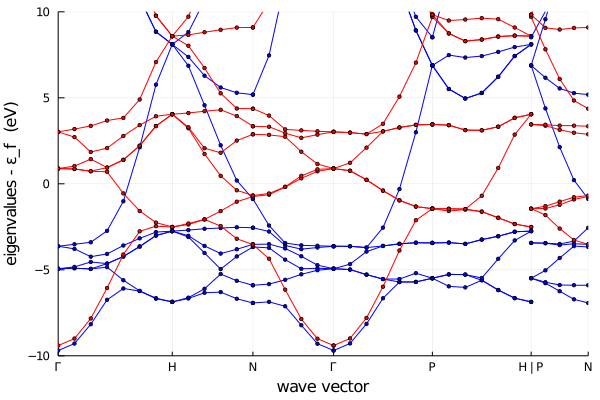

In [43]:
plot_bandstructure(scfres, kline_density=3)

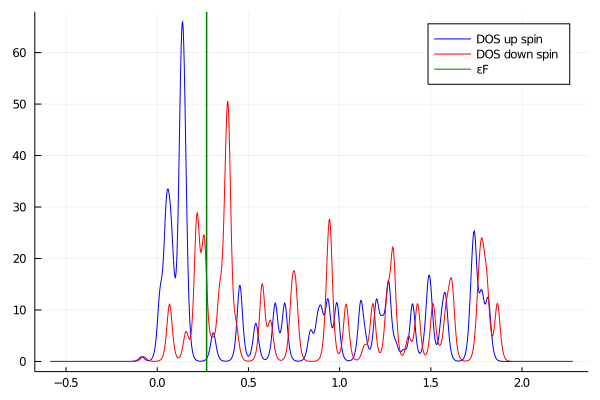

In [44]:
plot_dos(scfres)

In [18]:
## Graphite
a = 2.468u"angstrom"
c = 8.685u"angstrom"
lattice = [[a -0.5*a 0];
           [0. 0.5*sqrt(3)*a 0]; 
           [0. 0. c]]

3×3 Array{Quantity{Float64,D,U} where U where D,2}:
 2.468 Å   -1.234 Å      0.0
     0.0  2.13735 Å      0.0
     0.0        0.0  8.685 Å

In [19]:
C = ElementPsp(:C, psp=load_psp("hgh/lda/c-q4.hgh"))
atoms = [C => [[0, 0, 0.25],[2/3., 1/3., 0.25]]];

In [26]:
model = model_LDA(lattice, atoms)
kgrid = [20, 20, 2];
Ecut = 450.0u"eV";

In [27]:
basis = PlaneWaveBasis(model, Ecut; kgrid = kgrid)

PlaneWaveBasis (Ecut=16.53719497898337, 110 kpoints)

In [29]:
scfres = self_consistent_field(basis, tol=1e-10)

n     Energy            Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -11.22017249976         NaN   2.55e-01    2.8 
  2   -11.22612986348   -5.96e-03   3.87e-02    1.0 
  3   -11.22657116572   -4.41e-04   6.17e-03    1.5 
  4   -11.22660980475   -3.86e-05   1.16e-03    2.2 
  5   -11.22661038172   -5.77e-07   2.33e-04    2.1 
  6   -11.22661040998   -2.83e-08   2.11e-05    2.0 
  7   -11.22661041100   -1.02e-09   3.95e-06    2.8 
  8   -11.22661041102   -2.14e-11   6.33e-07    2.1 


(ham = Hamiltonian(PlaneWaveBasis (Ecut=16.53719497898337, 110 kpoints), HamiltonianBlock[HamiltonianBlock(PlaneWaveBasis (Ecut=16.53719497898337, 110 kpoints), Kpoint{Float64}(Model{Float64}([4.6638440755764 -2.3319220377882 0.0; 0.0 4.0390074487387135 0.0; 0.0 0.0 16.412271392374816], [1.3472117003403576 0.0 0.0; 0.777813037846919 1.555626075693838 0.0; 0.0 0.0 0.38283459717213614], 309.1628956719226, 0.8023285359108046, 3, 8, :none, 1, 0.0, DFTK.Smearing.None(), Pair{Any,Array{StaticArrays.SArray{Tuple{3},Float64,1,3},1}}[ElementPsp(6, :C, PspHgh(4, 0.34883045, [-8.5137711, 1.22843203, 0.0, 0.0], 1, [0.30455321, 0.2326773], [[9.52284179], Array{Float64}(undef,0,0)], "hgh/lda/c-q4.hgh", "C GTH-PADE-q4 GTH-LDA-q4")) => [[0.0, 0.0, 0.25], [0.6666666666666666, 0.3333333333333333, 0.25]]], Any[Kinetic(1), AtomicLocal(), AtomicNonlocal(), Ewald(), PspCorrection(), Hartree(1), Xc([:lda_xc_teter93], 1, nothing)], Tuple{StaticArrays.SArray{Tuple{3,3},Int64,2,9},StaticArrays.SArray{Tuple{3},F

In [30]:
scfres.energies

Energy breakdown:
    Kinetic             8.1070761 
    AtomicLocal         -45.3963049
    AtomicNonlocal      1.0004141 
    Ewald               9.4507794 
    PspCorrection       -0.0087825
    Hartree             19.0634068
    Xc                  -3.4431994

    total               -11.226610411019


In [32]:
basis.distance

LoadError: type PlaneWaveBasis has no field distance

Computing bands along kpath:
       Γ -> M -> K -> Γ -> A -> L -> H -> A  and  L -> M  and  K -> H


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:13


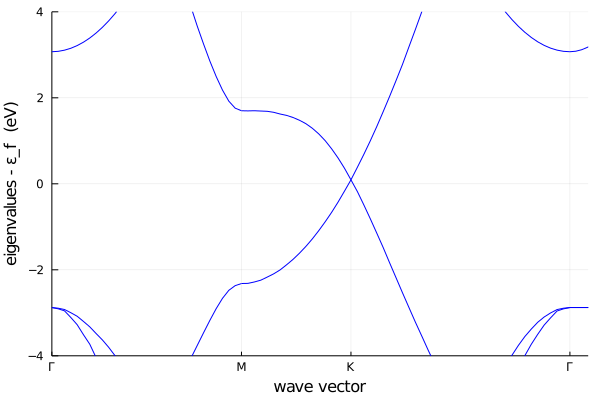

In [36]:
p = plot_bandstructure(scfres)


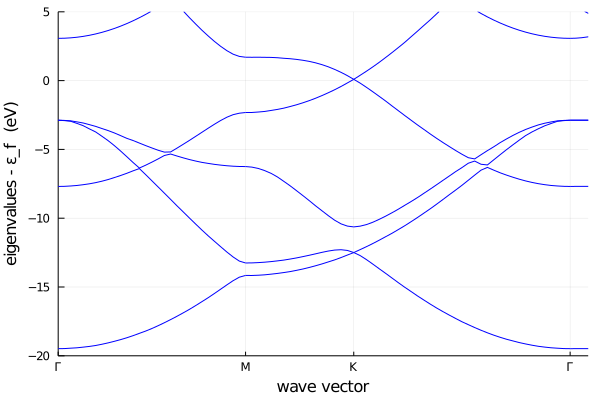

In [39]:
xlims!(p, 0, 2.2)
ylims!(p, -20, 5)